# Hypothesis Testing with Insurance Data
Cameron Peace

### Task

For this assignment, we will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

* [ ] State your Null Hypothesis and Alternative Hypothesis
* [ ] Select the correct test according to the data type and number of samples
* [ ] Test the assumptions of your selected test.
* [ ] Execute the selected test, or the alternative test (if you do not meet the assumptions)
* [ ] Interpret your p-value and reject or fail to reject your null hypothesis 
* [ ] Show a supporting visualization that helps display the result

### Data Background

From Kaggle:
>This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

There is no information regarding data collection, provenance, time frame, etc.  The data are assumed to be fictitious.

### Data Dictionary

* **Age**  - Age of primary beneficiary

* **sex** - Insurance contractor gender, female / male

* **bmi** - Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

* **children** - Number of children covered by health insurance / Number of dependents

* **smoker** - Smoker / Non - smoker

* **region** - The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* **charges** - Individual medical costs billed by health insurance.

### Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Loading, Viewing Data

In [3]:
# loading
df = pd.read_csv('insurance.csv')

# making a copy in case comparison is needed
df_original = df.copy()

In [4]:
# initial viewing
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
576,22,male,26.840,0,no,southeast,1664.99960
316,50,male,32.205,0,no,northwest,8835.26495
450,39,male,29.600,4,no,southwest,7512.26700
692,20,male,32.395,1,no,northwest,2362.22905
780,30,male,24.400,3,yes,southwest,18259.21600


In [5]:
display(df.info(), df.describe(include='all'), df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
This dataset looks fairly clean at first glance.  We have outliers in 'charges' and 'children'.  It appears our sexes are balanced, our smoker/non-smoker values are not (more non-smokers).  This dataset also seems to be skewed towards overweight/obese patients.
</i></font>

### Cleaning, checking data

In [6]:
# checking from duplicates
df.duplicated().sum()

1

In [7]:
# checking shape for confirmation
display(df.shape)

# removing duplicate entry
df = df.drop_duplicates().copy()

# confirming
display(df.shape)

(1338, 7)

(1337, 7)

In [8]:
# checking for NaNs
df.isna().sum().sum()

0

In [9]:
# checking for incorrect values 
for i in df.columns:
    if df[i].dtype == 'object' or df[i].nunique() < 15:
        print(i + ':\n', df[i].unique(), '\n****')

sex:
 ['female' 'male'] 
****
children:
 [0 1 3 2 5 4] 
****
smoker:
 ['yes' 'no'] 
****
region:
 ['southwest' 'southeast' 'northwest' 'northeast'] 
****


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Looking good here, we dropped 1 duplicate value, but otherwise our dataset looks clean.
</i></font>

## **Question 1: Do smokers have higher insurance charges than non-smokers?**

### Hypotheses Statements and Tests:

#### Null Hypothesis: 
***There is no significant difference in average insurance charges between smokers and non-smokers***

#### Alternative Hypothesis: 
***There is a significant difference in average insurance charges between smokers and non-smokers***

#### Alpha = 0.05

#### Which Test?
We'll use an independent t-test because we will be comparing means between two independent groups

#### *Note:  There seems to me to be an implicit 'average' that is left out of the question here.  That is, I think the question we're attempting to answer is: "Do smokers pay more on average than non-smokers for health insurance?"

#### Test Assumptions:
For an independent t-test to be viable, we will need:
* No significant outliers
* Normality
* Equal Variance (our sample sizes are large enough that this will not be necessary).

In [12]:
# creating the two groups
smokers = df[df['smoker'] == 'yes'].copy()
non_smokers = df[df['smoker'] == 'no'].copy()

# creating feature of interest
smokers_charges = smokers['charges']
non_smokers_charges = non_smokers['charges']

In [14]:
# checking
display(df.shape, smokers.shape, smokers_charges.shape, 
                 non_smokers.shape, non_smokers_charges.shape)
display(smokers.sample(5), non_smokers.sample(5))

(1337, 7)

(274, 7)

(274,)

(1063, 7)

(1063,)

,age,sex,bmi,children,smoker,region,charges
23,34,female,31.92,1,yes,northeast,37701.8768
682,39,male,35.30,2,yes,southwest,40103.8900
94,64,female,31.30,2,yes,southwest,47291.0550
736,37,female,38.39,0,yes,southeast,40419.0191
587,34,female,30.21,1,yes,northwest,43943.8761


,age,sex,bmi,children,smoker,region,charges
435,60,male,33.11,3,no,southeast,13919.82290
1073,54,female,28.88,2,no,northeast,12096.65120
772,44,female,36.48,0,no,northeast,12797.20962
552,62,male,21.40,0,no,southwest,12957.11800
787,21,male,36.86,0,no,northwest,1917.31840


### Viewing Distribution of charges

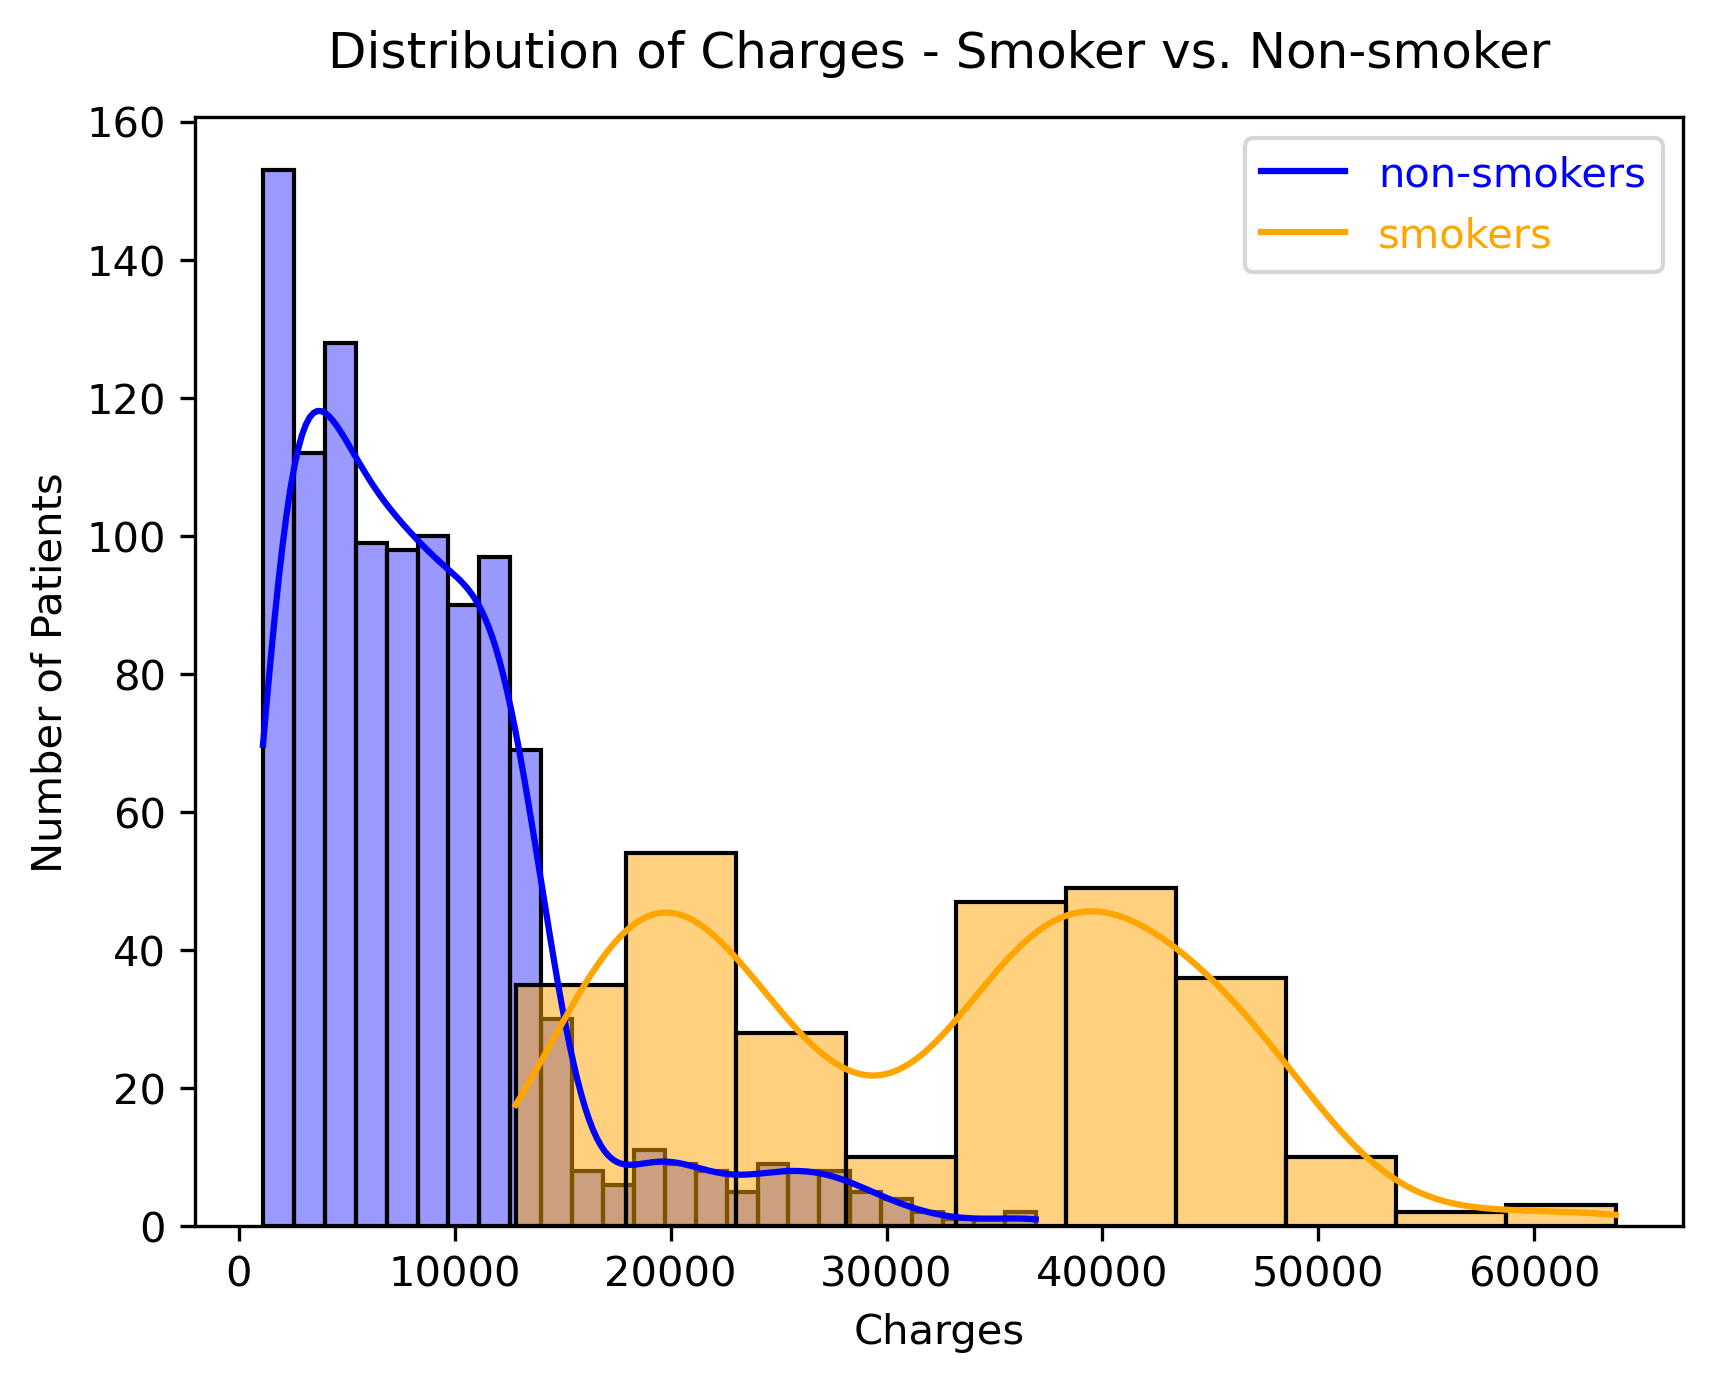

In [44]:
# plotting the distribution of charges between smokers and non-smokers
fig, ax = plt.subplots(dpi=300)
sns.histplot(non_smokers_charges, ax=ax, color='blue', 
             alpha=.4, kde=True)
sns.histplot(smokers_charges, ax=ax, label='smokers', color='orange', 
             kde=True)
plt.legend(['non-smokers', 'smokers'], labelcolor=['blue', 'orange'])
plt.title('Distribution of Charges - Smoker vs. Non-smoker', pad=12)
plt.ylabel('Number of Patients')
plt.xlabel('Charges');

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Well, it certainly looks like smokers pay more at first glance, but let's run some more numbers to make sure that is statistically the case.
</i></font>

### Check for and remove outliers

In [47]:
# creating zscores for each group
smokers_zs = stats.zscore(smokers_charges)
non_smokers_zs = stats.zscore(non_smokers_charges)

# checking
display(len(smokers_zs), len(non_smokers_zs))

274

1063

In [52]:
# checking for outliers
print(f'Outliers in smokers: {np.sum(abs(smokers_zs) > 3)}')
print(f'Outliers in non-smokers: {np.sum(abs(non_smokers_zs) > 3)}')

Outliers in smokers: 0
Outliers in non-smokers: 24


In [62]:
# removing outliers in non-smokers


## Question 2:  Are men more likely to smoke than women?

### Hypotheses Statements and Tests

#### Null Hypothesis: 
***Men and women are equally likely to smoke***

#### Alternative Hypothesis: 
***Men are more likely to smoke than women***

#### Alpha = 0.05

#### Which Test?
We'll use a chi-square test because we are comparing two categories.


## Question 3: Do different regions have different charges, on average?

### Hypotheses Statements and Tests

#### Null Hypothesis: 
***There is no significant difference between different regions when considering average charges***

#### Alternative Hypothesis: 
***There is a significant difference between different regions when considering average charges***

#### Alpha = 0.05

#### Which Test?
We'll use ANOVA here because we have more than 2 categories we're comparing